# Introduction

### Introduction or week 1 work

After opening the file the 1st thing i noticed it that we need to manage the upper portion of the bok having title and oher things etc.

In [39]:
f = open("PeterPan.txt", "r", encoding="utf-8-sig")
t = f.read()
len(t)

274951

The charater length of the text in the book is 274951 which means there are total 274951 characters in the whole book.

# NLTK TOKANIZERS

## Split the book to sentences

In [40]:
import nltk.tokenize as tok
sents = tok.sent_tokenize(t, language= "english")
len(sents)

2563

Yes the number corrosponds to the number of my expectations.

In [41]:
print(sents[0])
print ("------------------")
print(sents[1])
print ("------------------")


The Project Gutenberg eBook of Peter Pan, by James M. Barrie

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever.
------------------
You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org.
------------------


In [42]:
import re
t = re.sub(r"\n+", " ", t) #re.sub() is subsitude method in regular expression.
print(t[:100])

The Project Gutenberg eBook of Peter Pan, by James M. Barrie This eBook is for the use of anyone any


In [43]:
tokens = tok.word_tokenize(t, language="english")
len(tokens)

61946

In [44]:
f = open("peterpan.txt", "r", encoding="utf-8-sig")
t = f.read()
tokens = tok.word_tokenize(t, language="english")
print(len(t))
print(tokens[:30])


274951
['The', 'Project', 'Gutenberg', 'eBook', 'of', 'Peter', 'Pan', ',', 'by', 'James', 'M.', 'Barrie', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'in', 'the', 'United', 'States', 'and', 'most', 'other', 'parts', 'of']


# Frequency distribution and pandas

In [45]:
import collections
c = collections.Counter(tokens) # The Counter class is used to create a dictionary-like object 
del c["and"]
print(c.most_common(10))
print(c["with"])

[(',', 3981), ('.', 2441), ('the', 2330), ('“', 1464), ('”', 1464), ('to', 1222), ('a', 959), ('of', 923), ('was', 920), ('he', 878)]
361


In [46]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [47]:
def remove_punctuation(text):
    translator = str.maketrans("", "", string.punctuation)
    return text.translate(translator)
clean_text= remove_punctuation(t)

In [48]:
len(clean_text)
tokens = tok.word_tokenize(clean_text, language="english")
c = collections.Counter(tokens) # The Counter class is used to create a dictionary-like object 
print(c.most_common(10))
print(c["with"])

[('the', 2329), ('“', 1464), ('”', 1464), ('and', 1420), ('to', 1222), ('a', 959), ('of', 923), ('was', 923), ('he', 878), ('in', 698)]
361


In [57]:
import pandas as pd
data = c.most_common(20)
print (data)
df= pd.DataFrame(data, columns= ["Word","Frequency"])
print(df)

[('the', 2329), ('“', 1464), ('”', 1464), ('and', 1420), ('to', 1222), ('a', 959), ('of', 923), ('was', 923), ('he', 878), ('in', 698), ('it', 661), ('that', 609), ('’', 558), ('had', 499), ('you', 480), ('she', 477), ('they', 476), ('I', 464), ('her', 456), ('his', 456)]
    Word  Frequency
0    the       2329
1      “       1464
2      ”       1464
3    and       1420
4     to       1222
5      a        959
6     of        923
7    was        923
8     he        878
9     in        698
10    it        661
11  that        609
12     ’        558
13   had        499
14   you        480
15   she        477
16  they        476
17     I        464
18   her        456
19   his        456


In [50]:
tokens = tok.word_tokenize(clean_text, language="english")
print("Tokens= ", len(tokens))
print("Type of tokens= ", len(set(tokens))) # convert list of words to set leavinh just unique words.
print("Ratio= ",len(tokens)/len(set(tokens)))

Tokens=  54354
Type of tokens=  5836
Ratio=  9.313570938999314


In [51]:
df[df["Frequency"]>=1000]

,Word,Frequency
0,the,2329
1,“,1464
2,”,1464
3,and,1420
4,to,1222


In [52]:
h= df[df["Frequency"]==1]
hapex= len(h)
print(h)

Empty DataFrame
Columns: [Word, Frequency]
Index: []


In [53]:
percentage= hapex/len(tokens)*100
print(percentage)

0.0


5.3% of the words are hapex words in the whole document.

In [54]:
count=0
for words in tokens:
    if words[0]=="A" and words.istitle():
        count= count+1
print(count)

261


# Matplotlib 

[0 1 2 3 4 5 6 7 8 9]


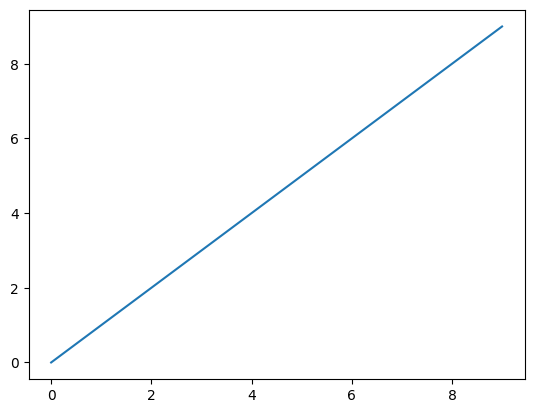

In [55]:
import numpy as np
numbers = np.arange(10)
print(numbers)
import matplotlib.pyplot as plt
plt.plot(numbers)


<AxesSubplot:xlabel='Word'>

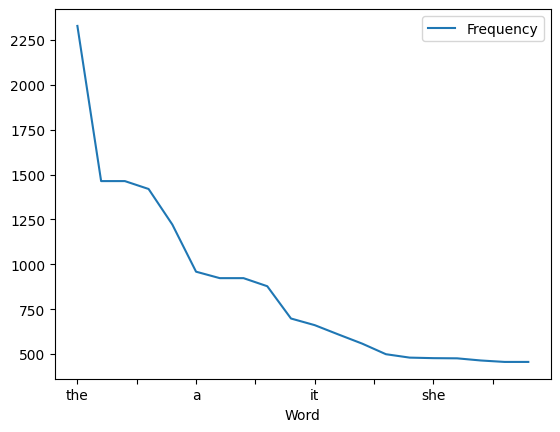

In [60]:
df= df.sort_values("Frequency", ascending=False)
df.plot(x="Word", y="Frequency" )

In [61]:
df_zipf = df[:2000].reset_index(drop=True)

In [64]:
df_zipf["z"] = df_zipf.index.values * df_zipf["Frequency"]
print(df_zipf)


    Word  Frequency     z
0    the       2329     0
1      “       1464  1464
2      ”       1464  2928
3    and       1420  4260
4     to       1222  4888
5      a        959  4795
6     of        923  5538
7    was        923  6461
8     he        878  7024
9     in        698  6282
10    it        661  6610
11  that        609  6699
12     ’        558  6696
13   had        499  6487
14   you        480  6720
15   she        477  7155
16  they        476  7616
17     I        464  7888
18   her        456  8208
19   his        456  8664
